Трансферное обучение

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model



base_model = MobileNetV2(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3)
                 )

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

В датасете 3135 изображений
Не удалось открыть data/archivee/F/3361_F.jpg: name 'Image' is not defined
Found 3135 files belonging to 9 classes.
Using 2195 files for training.
Found 3135 files belonging to 9 classes.
Using 940 files for validation.
0 класс - A
1 класс - B
2 класс - C
3 класс - D
4 класс - E
5 класс - F
6 класс - G
7 класс - H
8 класс - I
Всего классов: 9


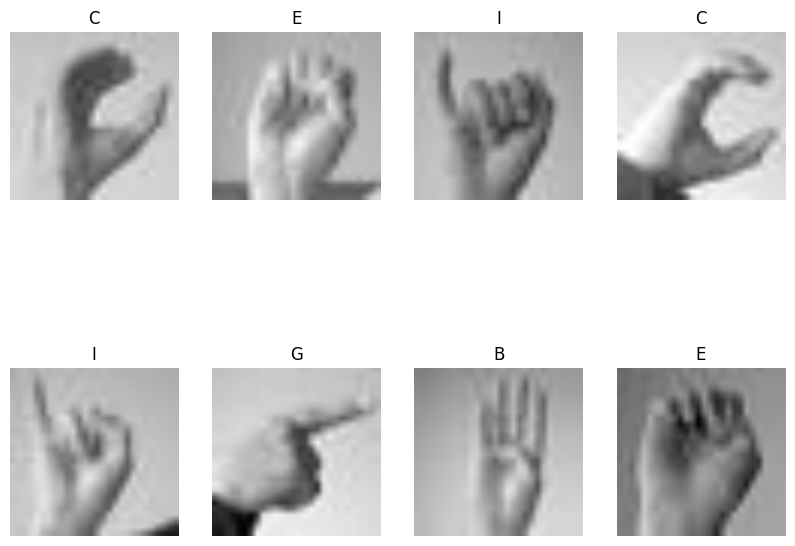

In [ ]:
import matplotlib.pyplot as plt
import PIL, os, urllib, zipfile, pathlib, shutil, platform, io
import numpy as np
from tensorflow import expand_dims, nn
from tensorflow.data import AUTOTUNE
from tensorflow.keras import losses, utils, layers, backend
from tensorflow.keras.models import Sequential, load_model

link = 'https://github.com/Vanya119/mdl/raw/refs/heads/main/archivee.zip'
batch_size = 64
img_height = 224
img_width = 224
val_part = 0.3

def last_root_folder(data_dir):
    out = ''
    for path, subfolders, _ in os.walk(data_dir):
        if subfolders==[]: return pathlib.Path(out).with_suffix('')
        else: out = path

if '.zip' in link:
    file_name = 'dataset.zip'; urllib.request.urlretrieve(link, file_name)
    folder_for_data = 'data'; win_path = 'C:/Users/Public/'+folder_for_data
    archive = zipfile.ZipFile(file_name)
    if 'windows' in platform.system().lower(): data_path = win_path
    else: data_path = folder_for_data
    if os.path.isdir(data_path): shutil.rmtree(data_path)
    archive.extractall(path=data_path); data_dir = last_root_folder(data_path)
else:
    file_name = link.split('/')[-1]
    data_dir = utils.get_file(file_name, origin=link, extract=True)
    data_dir = last_root_folder(data_dir)
pics = ['.jpg','.jpeg','.webp','.png']; last_img = ''; num_of_img = 0
for path, subdirs, files in os.walk(data_dir):
    for name in files:
        if any([ext in os.path.join(path, name) for ext in pics]):
            num_of_img+=1; last_img = os.path.join(path, name)
print(f'В датасете {num_of_img} изображений')
if last_img:
    try:
        with Image.open(str(last_img)) as one_of_imgs:
            print(f'Исходный размер: {one_of_imgs.size[0]}x{one_of_imgs.size[1]}')
    except Exception as e:
        print(f"Не удалось открыть {last_img}: {e}")

train_ds = utils.image_dataset_from_directory(
data_dir,
validation_split=val_part,
subset='training',
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

val_ds = utils.image_dataset_from_directory(
data_dir,
validation_split=val_part,
subset='validation',
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)
for i, c in enumerate(class_names): print(f'{i} класс - {c}')
print(f'Всего классов: {num_classes}')

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

plt.figure(figsize=(10, 8))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
accuracy, loss, val_accuracy, val_loss = [],[],[],[]

In [ ]:
epochs=30
model_history = model.fit(train_ds,
validation_data=val_ds,
batch_size=batch_size,
epochs=epochs,
verbose=1)
for a,l,va,vl in zip(model_history.history['accuracy'],
model_history.history['loss'],
model_history.history['val_accuracy'],
model_history.history['val_loss']):
    accuracy.append(a)
    loss.append(l)
    val_accuracy.append(va)
    val_loss.append(vl)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 869ms/step - accuracy: 0.2103 - loss: 2.1632 - val_accuracy: 0.4872 - val_loss: 1.5669
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5319 - loss: 1.4877 - val_accuracy: 0.6181 - val_loss: 1.2491
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6787 - loss: 1.1713 - val_accuracy: 0.7638 - val_loss: 1.0378
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7782 - loss: 0.9891 - val_accuracy: 0.8053 - val_loss: 0.8799
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8397 - loss: 0.8409 - val_accuracy: 0.8277 - val_loss: 0.7643
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8637 - loss: 0.7245 - val_accuracy: 0.8968 - val_loss: 0.6714
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8883 - loss: 0.6517 - val_accuracy: 0.8883 - val_loss: 0.6145
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9035 - loss: 0.5803 - val_accuracy: 0.9255 - val_loss: 

Text(0.5, 0, 'Эпоха')

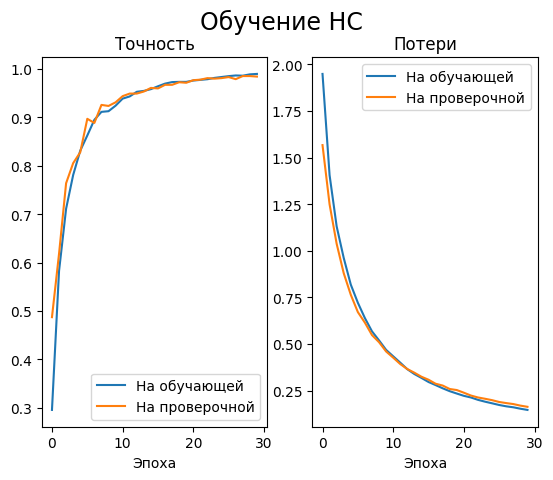

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(1, 2, 1)
plt.suptitle('Обучение НС', fontsize=17)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['На обучающей','На проверочной'])
plt.title('Точность')
plt.xlabel('Эпоха')
ax  = fig.add_subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['На обучающей','На проверочной'])
plt.title('Потери')
plt.xlabel('Эпоха')

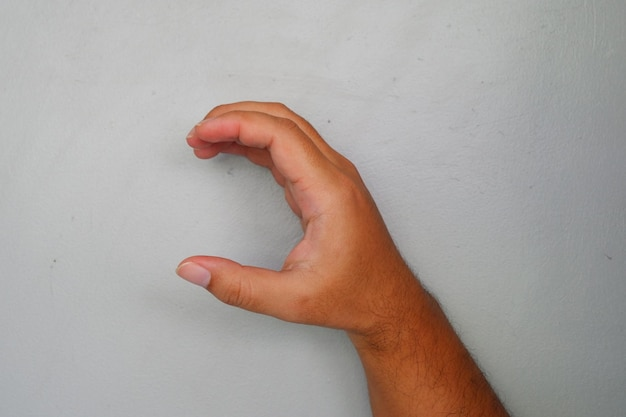

In [ ]:
file_path = 'https://img.freepik.com/premium-photo/hand-sign-language-for-letter-c_596820-42.jpg?size=626&ext=jpg'
if '://' in file_path:
    req = urllib.request.Request(file_path, headers={'User-Agent': 'Mozilla/5.0'})
    img_bytes = urllib.request.urlopen(req).read()
    img = PIL.Image.open(io.BytesIO(img_bytes))
    file_ext = '.jpg'
    if 'png' in file_path: file_ext = '.png'
    elif 'webp' in file_path: file_ext = '.webp'
    path = 'image' + file_ext
    img.save(path)
else: img = PIL.Image.open(rf'{file_path}')
img

In [ ]:
img.save(path)
img = utils.load_img(path, target_size=(img_height, img_width))
img_array = utils.img_to_array(img)
img_array = expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = nn.softmax(predictions[0])
pred_class = class_names[np.argmax(score)]
pred_p = round(float(np.max(score)), 3)
print(f'Изображение распознано как "{pred_class}" с вероятностью {pred_p}')
print('-'*30)
print('Вероятности других классов:')
scores = list(np.array(score))
for i, score in enumerate(scores):
    if i!=np.argmax(score):
        c=class_names[i]
        p=round(float(np.max(score)), 3)
        print(f'Для "{c}" вероятностью {p}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Изображение распознано как "C" с вероятностью 0.189
------------------------------
Вероятности других классов:
Для "B" вероятностью 0.098
Для "C" вероятностью 0.189
Для "D" вероятностью 0.097
Для "E" вероятностью 0.125
Для "F" вероятностью 0.097
Для "G" вероятностью 0.097
Для "H" вероятностью 0.101
Для "I" вероятностью 0.098
